In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import math

from sklearn.cluster import KMeans

from tqdm import tqdm

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Data preprocessing

# Handling missing values

In [4]:
df.isnull().sum()

# in income column we have 24 missing vlaues

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## income column missing values handling

In [5]:
# we can use mean value imputation but it is not as effective 
# we will use customized imputation
# we will use Education column for income missing value imputation
# genrally your income is genrally based on your education

In [6]:
# first we will impute 0 where null values are there

df['Income'] = df['Income'].fillna(0)
df['Income'].isnull().sum()

0

In [7]:
df['Income'].mean()

51687.459375

In [8]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [9]:
# now we will find how many missing values are present for respective education 


for i in df['Education'].unique():
    aa = df.loc[(df['Education'] == i)& (df['Income'] == 0)].shape[0]
    print(i, aa)
    


Graduation 11
PhD 5
Master 5
Basic 0
2n Cycle 3


<AxesSubplot:xlabel='Education,Education'>

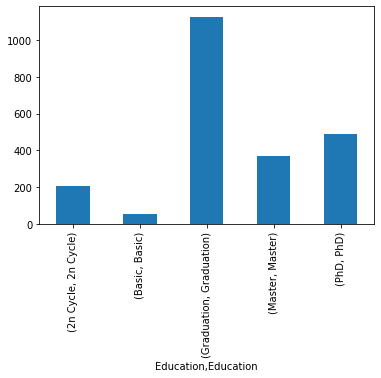

In [10]:
df.groupby('Education').Education.value_counts().plot.bar()

# most people are graduates

c:\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

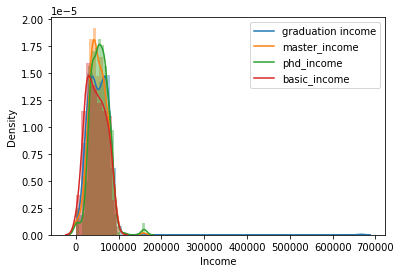

In [11]:
graduation_income = df.loc[df['Education'] == 'Graduation']['Income']
master_income = df.loc[df['Education'] == 'Master']['Income']
phd_income = df.loc[df['Education'] == 'PhD']['Income']
cycle_income = df.loc[df['Education'] == '2n Cycle']['Income']

sns.distplot(graduation_income)
sns.distplot(master_income)
sns.distplot(phd_income)
sns.distplot(cycle_income)
plt.legend(labels=['graduation income', 'master_income', 'phd_income', 'basic_income'])


In [12]:
cycle_income.describe()

count      203.000000
mean     46929.251232
std      22697.720075
min          0.000000
25%      26897.000000
50%      46772.000000
75%      65100.500000
max      96547.000000
Name: Income, dtype: float64

In [13]:
# mean of income column is 51.5 k and mean of income whoses education is 2n cycle is nearly 47k 
# so it is better to put 47k mean at missing values where education is 2n cycle

# simmilary we will find mean income value of every education and impute that mean value

In [14]:
graduation_income.describe()

count      1127.000000
mean      52205.800355
std       28514.654878
min           0.000000
25%       34593.500000
50%       51651.000000
75%       69737.000000
max      666666.000000
Name: Income, dtype: float64

In [15]:
master_income.describe()

count       370.000000
mean      52202.432432
std       20934.701438
min           0.000000
25%       36982.750000
50%       50183.500000
75%       66596.000000
max      157733.000000
Name: Income, dtype: float64

In [16]:
phd_income.describe()

count       486.000000
mean      55567.687243
std       21276.234237
min           0.000000
25%       39821.250000
50%       55005.000000
75%       69084.000000
max      162397.000000
Name: Income, dtype: float64

In [17]:
mean_value = {'Graduation':graduation_income.mean(), 'PhD':phd_income.mean(), 'Master':master_income.mean(),  '2n Cycle':cycle_income.mean()}

mean_value

{'Graduation': 52205.80035492458,
 'PhD': 55567.687242798354,
 'Master': 52202.43243243243,
 '2n Cycle': 46929.251231527094}

In [18]:
# imputing missing values of income column
for i in range(df.shape[0]):
    
    if df.at[i, 'Income'] == 0 :
        df.at[i, 'Income'] = mean_value[df.at[i, 'Education']]
    

# Handling categorical variable

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [20]:
# education, martial_Status, DT_customer
# we will use pandas to encode education column and marital status column

In [21]:
df_encoded = pd.get_dummies(df , columns=['Education', 'Marital_Status'])
df_encoded

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,1,0,0,0
1,2174,1954,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,1,0,0,0
2,4141,1965,71613.0,0,0,21-08-2013,26,426,49,127,...,0,0,0,0,0,0,0,1,0,0
3,6182,1984,26646.0,1,0,10-02-2014,26,11,4,20,...,0,0,0,0,0,0,0,1,0,0
4,5324,1981,58293.0,1,0,19-01-2014,94,173,43,118,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,13-06-2013,46,709,43,182,...,0,0,0,0,0,1,0,0,0,0
2236,4001,1946,64014.0,2,1,10-06-2014,56,406,0,30,...,0,1,0,0,0,0,0,1,0,0
2237,7270,1981,56981.0,0,0,25-01-2014,91,908,48,217,...,0,0,0,0,1,0,0,0,0,0
2238,8235,1956,69245.0,0,1,24-01-2014,8,428,30,214,...,1,0,0,0,0,0,0,1,0,0


# feature transforamtion/ feature engineering

In [22]:
# for Dt_customer column we will delete this column 
# and derive a new column based on this column whose data will be from today how many years an customer is with company


for i in range(df.shape[0]): 
#     print(i, '-'*5,type(i))
    temp = df_encoded.at[i, 'Dt_Customer']
    date = datetime.strptime(temp, '%d-%m-%Y')
    
    current_date = datetime.now()
    
    time = (current_date - date).days
    
    
    df_encoded.at[i, 'Customer_dt'] = math.ceil(time/365)

df_encoded.drop('Dt_Customer', inplace=True, axis = 1)


In [23]:
df_encoded['Customer_dt']

0       10.0
1        9.0
2        9.0
3        9.0
4        9.0
        ... 
2235    10.0
2236     9.0
2237     9.0
2238     9.0
2239    10.0
Name: Customer_dt, Length: 2240, dtype: float64

# Clustering using k-means algorithm

### Determing hyperparameter k

In [24]:
wss_score = []  # This list will contain wss score 

# so we will use k values from 1 to 20
for i in tqdm(range(1,20)):
    kmean_model = KMeans(n_clusters=i, init='k-means++', n_init=25, algorithm="auto")
    kmean_model.fit(df_encoded)
    wss_score.append(kmean_model.inertia_)
    
wss_score

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:08<00:00,  2.24it/s]


[1427740641107.4978,
 704600982185.802,
 349375591953.0662,
 206890694669.81824,
 147728465654.2769,
 105839924966.68901,
 77259286990.73817,
 64134655741.291,
 54819741894.13142,
 47706468439.09783,
 42520266312.58793,
 39122749484.54051,
 36409680478.597244,
 33647921065.935547,
 30852111058.310627,
 28558515323.18417,
 26491893442.713688,
 24611382978.21478,
 23058701187.43276]

### Plotting elbow plot

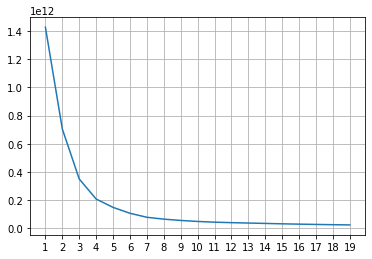

In [25]:
x = [i for i in range(1,20)]
plt.plot(x, wss_score, linestyle = 'solid')
plt.xticks(x)
plt.grid()

In [26]:
# by looking at elbow plot I think number of clusters should be 4 because from there we have a sharp fall in graph

# k-mean clustering using value of k = 4

In [27]:
kmean_model = KMeans(n_clusters=4, init='k-means++', n_init=25, algorithm="auto")
kmean_model.fit(df_encoded)

clusters = kmean_model.labels_

In [28]:
clusters

array([3, 3, 0, ..., 3, 0, 3])

# saving clusters labels to submission csv file

In [29]:
submission_df = pd.DataFrame(data=clusters, columns=['Clusters'])

submission_df.to_csv('dhruvil_dholariya.csv', index=False)